In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv("train.csv")

In [66]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [67]:
data.shape

(233154, 41)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [69]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

# Uni-variate EDA

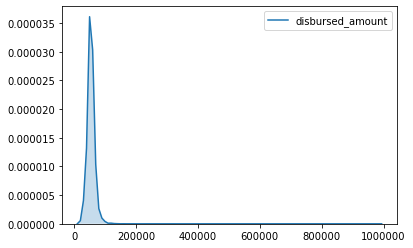

In [70]:
sns.kdeplot(data.disbursed_amount,shade=True)

The disbursed amount column is right skewed. Applying log transformation might normalize it. 

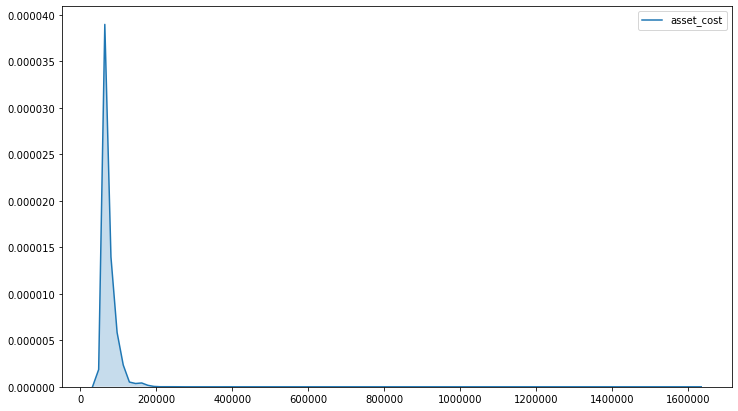

In [71]:
plt.figure(figsize=(12,7))
sns.kdeplot(data.asset_cost,shade=True)

The asset cost is also right skewed. Applying transformations might help

(array([1.5000e+01, 2.7800e+02, 1.0360e+03, 3.1230e+03, 7.4450e+03,
        1.6838e+04, 3.3071e+04, 6.3251e+04, 7.8058e+04, 3.0039e+04]),
 array([10.03 , 18.527, 27.024, 35.521, 44.018, 52.515, 61.012, 69.509,
        78.006, 86.503, 95.   ]),
 <a list of 10 Patch objects>)

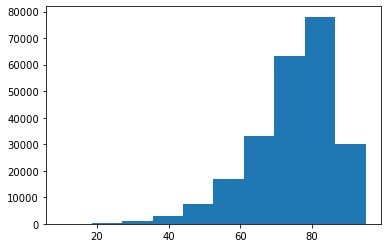

In [72]:
plt.hist(data.ltv)

LTV ---> Loan to value of asset ratio.
Generally, An LTV ratio of 80% or lower is considered good for most mortgage loan scenarios. An LTV ratio of 80% provides the best chance of being approved, the best interest rate

Most observations are found between 60 - 90

In [73]:
data.ltv.describe()

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: ltv, dtype: float64

Even though there are visual outliers, the mean and median are nearly same, indicating that the outliers didn't effect much. But still, it's better to apply log transformation.

We can also see that the std.dev is 11. i.e, most values are concentrated in the range of 63 - 85

In [74]:
len(np.unique(data.branch_id))

82

There are 82 branches of the bank. Applying loan in banks located in urban areas may increase chance of approval. Need to check

NOTE : Here I'm omitting supplier_id and manufacturer_id as this model is being created for loan default and not vehicle loan default in specific

In [75]:
len(np.unique(data.Current_pincode_ID))

6698

There are a total 6698 pincodes, i.e 6698 regions

In [76]:
data["Date.of.Birth"].head()

0    01-01-84
1    31-07-85
2    24-08-85
3    30-12-93
4    09-12-77
Name: Date.of.Birth, dtype: object

In [77]:
data["Date.of.Birth"].dtype

dtype('O')

We can probably acquire age from date of birth. Converting the date into date time format will be much useful

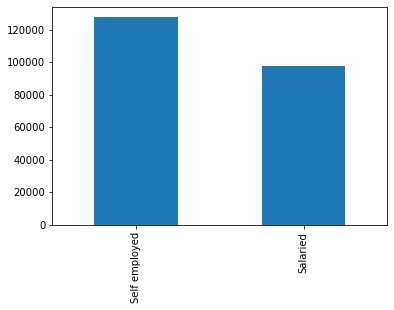

In [78]:
data["Employment.Type"].value_counts().plot("bar")

The demographics show that there are more self-employed than salaried. In a practical world, salaried people have more chance of loan approval. Need to confirm this hypothesis in further stages

In [79]:
data["DisbursalDate"].head()

0    03-08-18
1    26-09-18
2    01-08-18
3    26-10-18
4    26-09-18
Name: DisbursalDate, dtype: object

Probably we can calculate the no. of days since loan disbursed. We will check whether the acquired information really effects the chance of loan approval.

In [80]:
len(data['State_ID'].value_counts())

22

There are 22 states. But, as we already have pincode info, this info is of no great use

NOTE : Employee_code_ID is ommitted because it's of no use

In [81]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

1


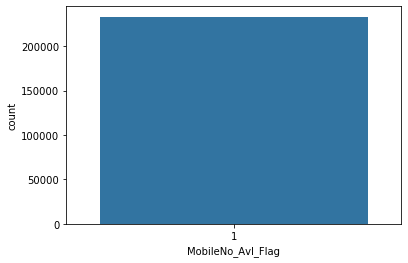

In [82]:
sns.countplot(data.MobileNo_Avl_Flag)
print(len(np.unique(data.MobileNo_Avl_Flag)))

This column is of no use because there is only one value

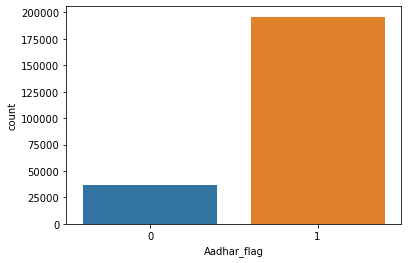

In [83]:
sns.countplot(data.Aadhar_flag)

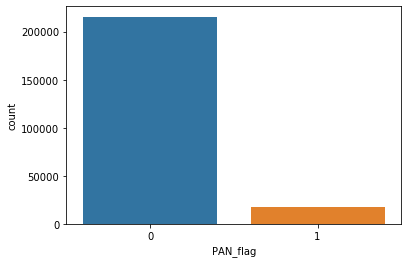

In [84]:
sns.countplot(data.PAN_flag)

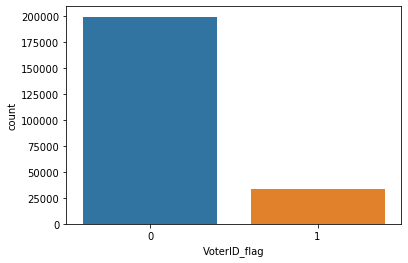

In [85]:
sns.countplot(data.VoterID_flag)

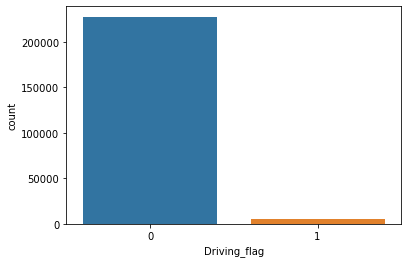

In [86]:
sns.countplot(data.Driving_flag)

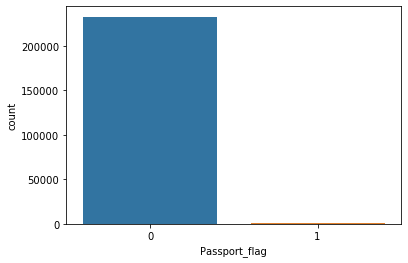

In [87]:
sns.countplot(data.Passport_flag)

In [88]:
data["PERFORM_CNS.SCORE"].head(10)

0      0
1    598
2      0
3    305
4      0
5    825
6      0
7     17
8    718
9    818
Name: PERFORM_CNS.SCORE, dtype: int64

PERFORM_CNS.SCORE ---> CIBIL score or bureau score.  

A CIBIL score or credit score is a number that is used to signify the creditworthiness of an individual. 

A CIBIL score ranges from 300 – 900, 900 being the highest. Generally, individuals with a CIBIL score of 750 and above are considered as responsible borrowers.

In [89]:
data["PERFORM_CNS.SCORE.DESCRIPTION"].head(10)

0                          No Bureau History Available
1                                        I-Medium Risk
2                          No Bureau History Available
3                                     L-Very High Risk
4                          No Bureau History Available
5                                      A-Very Low Risk
6                          No Bureau History Available
7    Not Scored: Not Enough Info available on the c...
8                                      D-Very Low Risk
9                                      A-Very Low Risk
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: object

Using PERFORM_CNS.SCORE.DESCRIPTION makes more sense as it is already classified as low,medium and high risk. So, we'll drop the PERFORM_CNS.SCORE column. Need to convert PERFORM_CNS.SCORE.DESCRIPTION as labels.

In [90]:
data["PRI.NO.OF.ACCTS"].describe()

count    233154.000000
mean          2.440636
std           5.217233
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: PRI.NO.OF.ACCTS, dtype: float64

The min and max have huge difference. But the mean and median are close and std.dev is not too high. This indicates that even though there are outliers, it's not effecting much. But it will effect the model performance. We will try to drop the outliers if the no. of extreme observations are low.

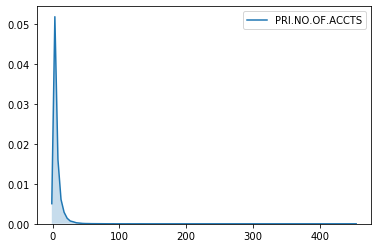

In [91]:
sns.kdeplot(data["PRI.NO.OF.ACCTS"],shade=True)

In [92]:
len(data[data["PRI.NO.OF.ACCTS"]>50])

219

In [93]:
'''Pri.No.Of.Accts (bin)	Count of Pri.No.Of.Accts
0	                         2,31,690
27	                         1,294
54	                         129
81	                         27
108	                         6
136	                         4
190	                         1
271	                         1 
352	                         1
434	                         1 
'''

'Pri.No.Of.Accts (bin)\tCount of Pri.No.Of.Accts\n0\t                         2,31,690\n27\t                         1,294\n54\t                         129\n81\t                         27\n108\t                         6\n136\t                         4\n190\t                         1\n271\t                         1 \n352\t                         1\n434\t                         1 \n'

The above data is extracted from tableau histogram. Let's take 100 as threshold and drop anything beyond that value in further steps

NOTE : PRI.NO.OF.ACCTS & PRI.ACTIVE.ACCTS can be dropped because, indirectly we are having that information in PRI.OVERDUE.ACCTS.

In [94]:
data["PRI.OVERDUE.ACCTS"].describe()

count    233154.000000
mean          0.156549
std           0.548787
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: PRI.OVERDUE.ACCTS, dtype: float64

There are outliers not but more in number.

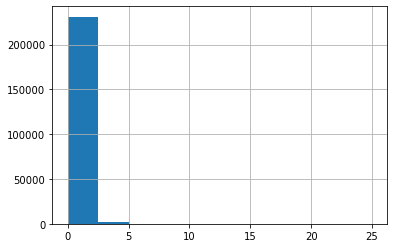

In [95]:
data["PRI.OVERDUE.ACCTS"].hist()

In [96]:
'''
Pri.Overdue.Accts (bin)	Count of Pri.Overdue.Accts
22	                    2
17	                    5
14	                    7
11	                    13
8	                    43
6	                    161
3	                    1,772
0	                    2,31,151


'''

'\nPri.Overdue.Accts (bin)\tCount of Pri.Overdue.Accts\n22\t                    2\n17\t                    5\n14\t                    7\n11\t                    13\n8\t                    43\n6\t                    161\n3\t                    1,772\n0\t                    2,31,151\n\n\n'

Let's take 11 as max threshold and drop remaining observations

In [97]:
data[["PRI.CURRENT.BALANCE","loan_default"]].head()

,PRI.CURRENT.BALANCE,loan_default
0,0,0
1,27600,1
2,0,0
3,0,1
4,0,1


The outstanding principal balance of a mortgage is simply the total amount of money it would take to pay off the loan in full

In [98]:
np.unique(data.loan_default)

array([0, 1], dtype=int64)

In [99]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [100]:
data['PRI.DISBURSED.AMOUNT'].describe()

count    2.331540e+05
mean     2.180659e+05
std      2.377744e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.080000e+04
max      1.000000e+09
Name: PRI.DISBURSED.AMOUNT, dtype: float64

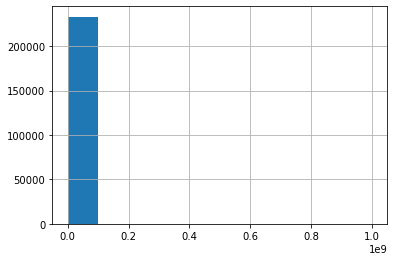

In [101]:
data['PRI.DISBURSED.AMOUNT'].hist()

In [102]:
'''
Pri.Disbursed.Amount (bin)	Count of Pri.Disbursed.Amount
990M	                       1
106M	                       1
92M	                           2
79M	                           2
66M	                           4
53M	                           8
40M	                           14
26M	                           35
13M	                           138
0M	                           2,32,949

'''

'\nPri.Disbursed.Amount (bin)\tCount of Pri.Disbursed.Amount\n990M\t                       1\n106M\t                       1\n92M\t                           2\n79M\t                           2\n66M\t                           4\n53M\t                           8\n40M\t                           14\n26M\t                           35\n13M\t                           138\n0M\t                           2,32,949\n\n'

drop everything abov 26M

In [103]:
data["SEC.NO.OF.ACCTS"].describe()

count    233154.000000
mean          0.059081
std           0.626795
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          52.000000
Name: SEC.NO.OF.ACCTS, dtype: float64

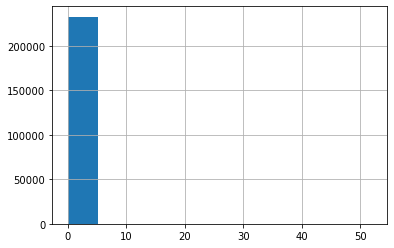

In [104]:
data['SEC.NO.OF.ACCTS'].hist()

In [105]:
'''
Sec.No.Of.Accts (bin)	Count of Sec.No.Of.Accts
51	                     1
42	                     3
37	                     2
33	                     4
28	                     8
23	                     3
19	                     21
14	                     43
9	                     94
5	                     448
0	                     2,32,527

'''

'\nSec.No.Of.Accts (bin)\tCount of Sec.No.Of.Accts\n51\t                     1\n42\t                     3\n37\t                     2\n33\t                     4\n28\t                     8\n23\t                     3\n19\t                     21\n14\t                     43\n9\t                     94\n5\t                     448\n0\t                     2,32,527\n\n'

drop everything above 14

In [106]:
data["SEC.ACTIVE.ACCTS"].describe()

count    233154.000000
mean          0.027703
std           0.316057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: SEC.ACTIVE.ACCTS, dtype: float64

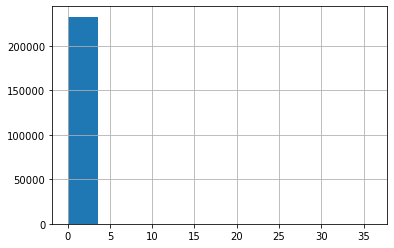

In [107]:
data["SEC.ACTIVE.ACCTS"].hist()

In [108]:
'''
Sec.Active.Accts (bin)	Count of Sec.Active.Accts
35	                    1
24	                    1
20	                    4
16	                    3
12	                    14
8	                    44
4	                    235
0	                    2,32,852

'''

'\nSec.Active.Accts (bin)\tCount of Sec.Active.Accts\n35\t                    1\n24\t                    1\n20\t                    4\n16\t                    3\n12\t                    14\n8\t                    44\n4\t                    235\n0\t                    2,32,852\n\n'

drop everything above 8

We can probably create new feature "total_VS_active_accnts" as NO.OF.ACCTS - NO.OF.ACTIVE.ACCTS for both primary and secondary accnts

In [109]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [110]:
data["SEC.OVERDUE.ACCTS"].describe()

count    233154.000000
mean          0.007244
std           0.111079
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: SEC.OVERDUE.ACCTS, dtype: float64

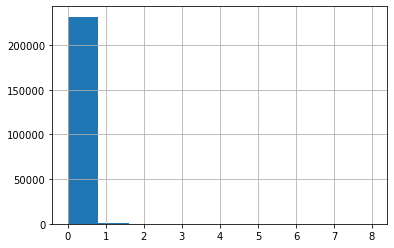

In [111]:
data["SEC.OVERDUE.ACCTS"].hist()

In [112]:
'''
Sec.Overdue.Accts (bin)	Count of Sec.Overdue.Accts
8	                     1
7	                     1
5	                     6
4	                     27
3	                     47
1	                     126
0	                     2,32,946

'''

'\nSec.Overdue.Accts (bin)\tCount of Sec.Overdue.Accts\n8\t                     1\n7\t                     1\n5\t                     6\n4\t                     27\n3\t                     47\n1\t                     126\n0\t                     2,32,946\n\n'

drop everything above 3

In [113]:
data["SEC.CURRENT.BALANCE"].describe()

count    2.331540e+05
mean     5.427793e+03
std      1.702370e+05
min     -5.746470e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.603285e+07
Name: SEC.CURRENT.BALANCE, dtype: float64

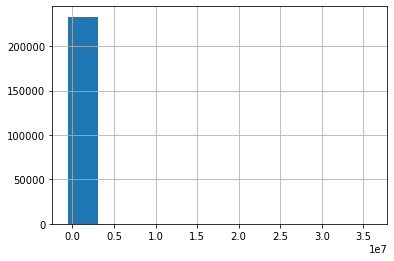

In [114]:
data["SEC.CURRENT.BALANCE"].hist()

drop everything above 3,331,140

In [115]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [116]:
data['PRIMARY.INSTAL.AMT'].describe()

count    2.331540e+05
mean     1.310548e+04
std      1.513679e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.999000e+03
max      2.564281e+07
Name: PRIMARY.INSTAL.AMT, dtype: float64

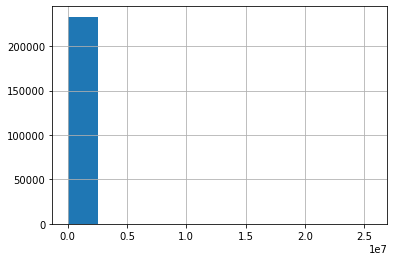

In [117]:
data['PRIMARY.INSTAL.AMT'].hist()

In [118]:
data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].head()

0    0
1    0
2    0
3    0
4    0
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

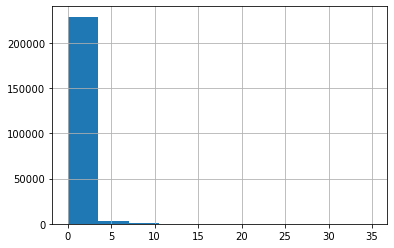

In [119]:
data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].hist()

Drop everything above 15

In [120]:
data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].describe()

count    233154.000000
mean          0.097481
std           0.384439
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: float64

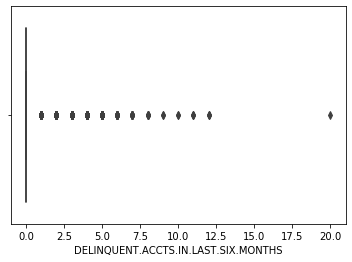

In [121]:
sns.boxplot(data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'])

Drop above 5

In [122]:
data['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

NOTE : Need to convert the AVERAGE.ACCT.AGE and CREDIT.HISTORY.LENGTH into integers and then to total mnths

In [123]:
data["NO.OF_INQUIRIES"].value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

drop above 11

# Finally, the target variable

In [124]:
data['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

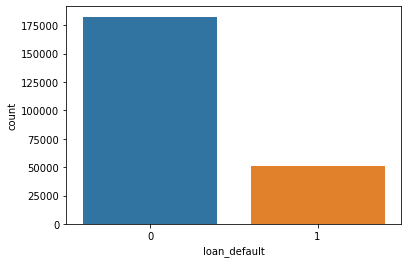

In [125]:
sns.countplot(data["loan_default"])

As expected, the data is imbalanced. We will normalize the majority and minority classes by applying SMOTE